In [1]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/ani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/ani/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [3]:
data = pd.read_csv(r'../fake_or_real_news.csv')

/tmp/ipykernel_165142/1469765927.py:1: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,213,214,215,216,217,218,219,220,221,222,223,224,226,227,228,229,231,232,233,234,236,237,238,239,240,241,243,244,245,246,247,248,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,

In [4]:
data = data.drop(['author', 'text'], axis = 1)

In [5]:
data = data.iloc[:, :2]
data.head()

,title,label
0,You Can Smell Hillary’s Fear,FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE
2,Kerry to go to Paris in gesture of sympathy,REAL
3,Bernie supporters on Twitter erupt in anger ag...,FAKE
4,The Battle of New York: Why This Primary Matters,REAL


In [6]:
data = data.dropna()

In [7]:
data.loc[data.label != 'REAL', 'label'] = 1
data.loc[data.label == 'REAL', 'label'] = 0

In [8]:
y = data.iloc[:, -1:].values
y = [i for sub in y for i in sub]

In [9]:
x = data['title']
x

0                             You Can Smell Hillary’s Fear
1        Watch The Exact Moment Paul Ryan Committed Pol...
2              Kerry to go to Paris in gesture of sympathy
3        Bernie supporters on Twitter erupt in anger ag...
4         The Battle of New York: Why This Primary Matters
                               ...                        
70795    Tesla Earnings Smash Expectations After Dramat...
70796     Rules For Rulers (Or How The World Really Works)
70797    Fact Check: Trump Is Right that Clinton Might ...
70798    Caught On Tape: ISIS Destroys Iraqi Abrams Wit...
70799    ObamaCare Architect Admits "The Law Is Working...
Name: title, Length: 65046, dtype: object

In [10]:
def lemma(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text = [w for w in text if not w in stop_words]
    text = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(text)
    return text

In [11]:
x = x.apply(lemma)
x

0                                       smell hillary fear
1        watch exact moment paul ryan committed politic...
2                          kerry go paris gesture sympathy
3        bernie supporter twitter erupt anger dnc tried...
4                           battle new york primary matter
                               ...                        
70795    tesla earnings smash expectation dramatic chan...
70796                         rule ruler world really work
70797        fact check trump right clinton might cause ww
70798    caught tape isi destroys iraqi abrams anti tan...
70799    obamacare architect admits law working designe...
Name: title, Length: 65046, dtype: object

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

In [13]:
tfidf = TfidfVectorizer(max_features=5000)
lr_model = LogisticRegression()

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [15]:
x_train = tfidf.fit_transform(x_train).toarray()
x_test = tfidf.transform(x_test).toarray()

In [16]:
def logReg(x, y):
  lr_model.fit(x_train, y_train)
  y_trainPred = lr_model.predict(x_train)
  y_testPred = lr_model.predict(x_test)
  print("Accuracy of training = ", accuracy_score(y_trainPred, y_train))
  print('Training accuracy\n')
  print(classification_report(y_train, y_trainPred))
  print("Accuracy of Testing = ", accuracy_score(y_testPred, y_test))
  print('Testing Results\n')
  clf_report = classification_report(y_test, y_testPred, output_dict=True)
  print(classification_report(y_test, y_testPred))
  return clf_report

In [17]:
clf = logReg(x_train, y_train)

Accuracy of training =  0.9566838342685833
Training accuracy

              precision    recall  f1-score   support

           0       0.83      0.12      0.21      2497
           1       0.96      1.00      0.98     49539

    accuracy                           0.96     52036
   macro avg       0.89      0.56      0.60     52036
weighted avg       0.95      0.96      0.94     52036

Accuracy of Testing =  0.9518831667947732
Testing Results

              precision    recall  f1-score   support

           0       0.70      0.10      0.18       664
           1       0.95      1.00      0.98     12346

    accuracy                           0.95     13010
   macro avg       0.83      0.55      0.58     13010
weighted avg       0.94      0.95      0.93     13010



<AxesSubplot:>

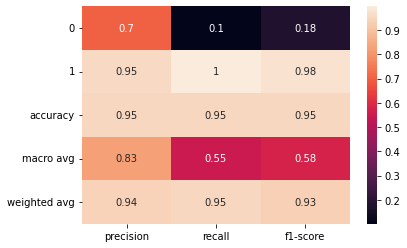

In [18]:
import seaborn as sns
sns.heatmap(pd.DataFrame(clf).iloc[:-1, :].T, annot=True)